In [1]:
# Import Libraries, Read Data, Drop nan
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

crime_df_raw = pd.read_csv('data/crimes.csv')
crime_df_raw.dropna(inplace=True);

In [ ]:
# Get Data Set, Create Month and Day Columns, Apply Date Index
crime_df = crime_df_raw.copy()

crime_df['Month'] = pd.to_datetime(crime_df['Date']).dt.month
crime_df['Day'] = pd.to_datetime(crime_df['Date']).dt.day
#crime_df = crime_df[ crime_df['Month'] == 1]
crime_df.index = pd.to_datetime(crime_df['Date'])
print(crime_df.shape)

[2018]


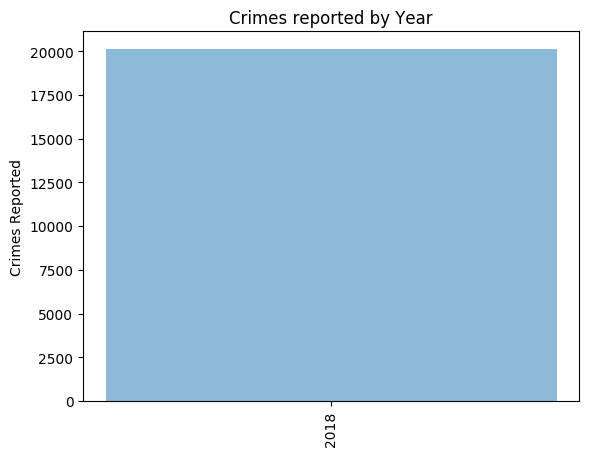

In [41]:
years = crime_df['Year'].unique()
years.sort(axis=0)
print(years)
y_pos = np.arange(len(years))
row_counts = []
for y in years:
    count = crime_df[ crime_df['Year'] == y].shape[0]
    row_counts.append(count)
plt.bar(y_pos, row_counts, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Crimes Reported')
plt.title('Crimes reported by Year')
plt.xticks(rotation=90)
plt.show()


['OTHER OFFENSE' 'CRIMINAL DAMAGE' 'MOTOR VEHICLE THEFT' 'NARCOTICS'
 'BATTERY' 'LIQUOR LAW VIOLATION' 'ASSAULT' 'CRIMINAL TRESPASS' 'THEFT'
 'INTERFERENCE WITH PUBLIC OFFICER' 'PROSTITUTION' 'ROBBERY'
 'WEAPONS VIOLATION' 'DECEPTIVE PRACTICE' 'PUBLIC PEACE VIOLATION'
 'BURGLARY' 'ARSON' 'OBSCENITY' 'OFFENSE INVOLVING CHILDREN' 'HOMICIDE'
 'NON-CRIMINAL' 'CRIM SEXUAL ASSAULT' 'KIDNAPPING' 'SEX OFFENSE'
 'STALKING' 'GAMBLING' 'INTIMIDATION' 'CONCEALED CARRY LICENSE VIOLATION'
 'HUMAN TRAFFICKING']


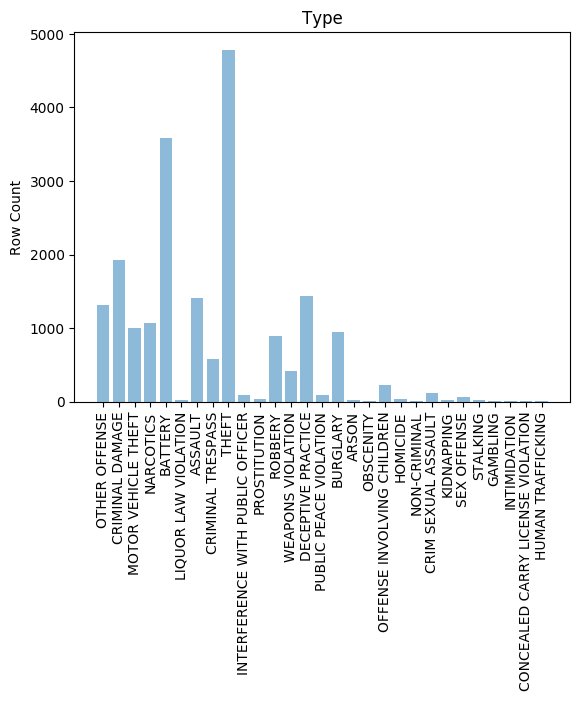

In [42]:
# Crime breakdown by Crime Type

crime_types = crime_df['Primary Type'].unique()
print(crime_types)
y_pos_types = np.arange(len(crime_types))
counts_types = []
for t in crime_types:
    count = crime_df[ crime_df['Primary Type'] == t].shape[0]
    counts_types.append(count)
plt.bar(y_pos_types, counts_types, align='center', alpha=0.5)
plt.xticks(y_pos_types, crime_types)
plt.ylabel('Row Count')
plt.title('Type')
plt.xticks(rotation=90)
plt.show()

[ 6. 22.  1. 25. 11. 10.  3.  4.  8. 15. 18.  7. 24. 16. 17.  2.  9. 19.
 20. 14. 12.  5.]


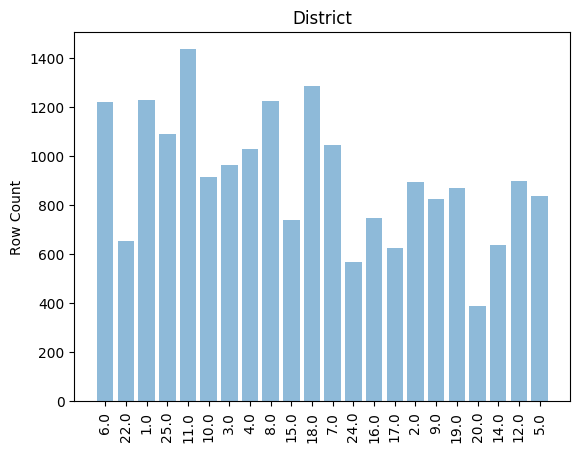

In [43]:
# Crime breakdown by District

districts = crime_df['District'].unique()
print(districts)
y_pos_areas = np.arange(len(districts))
counts_districts = []
for t in districts:
    count = crime_df[ crime_df['District'] == t].shape[0]
    counts_districts.append(count)
plt.bar(y_pos_areas, counts_districts, align='center', alpha=0.5)
plt.xticks(y_pos_areas, districts)
plt.ylabel('Row Count')
plt.title('District')
plt.xticks(rotation=90)
plt.show()

In [58]:
# Create Train and Test Data

train = crime_df[crime_df['Day'] < 21].resample('D').apply({'Date': 'count'})
test = crime_df[crime_df['Day'] > 20].resample('D').apply({'Date': 'count'})

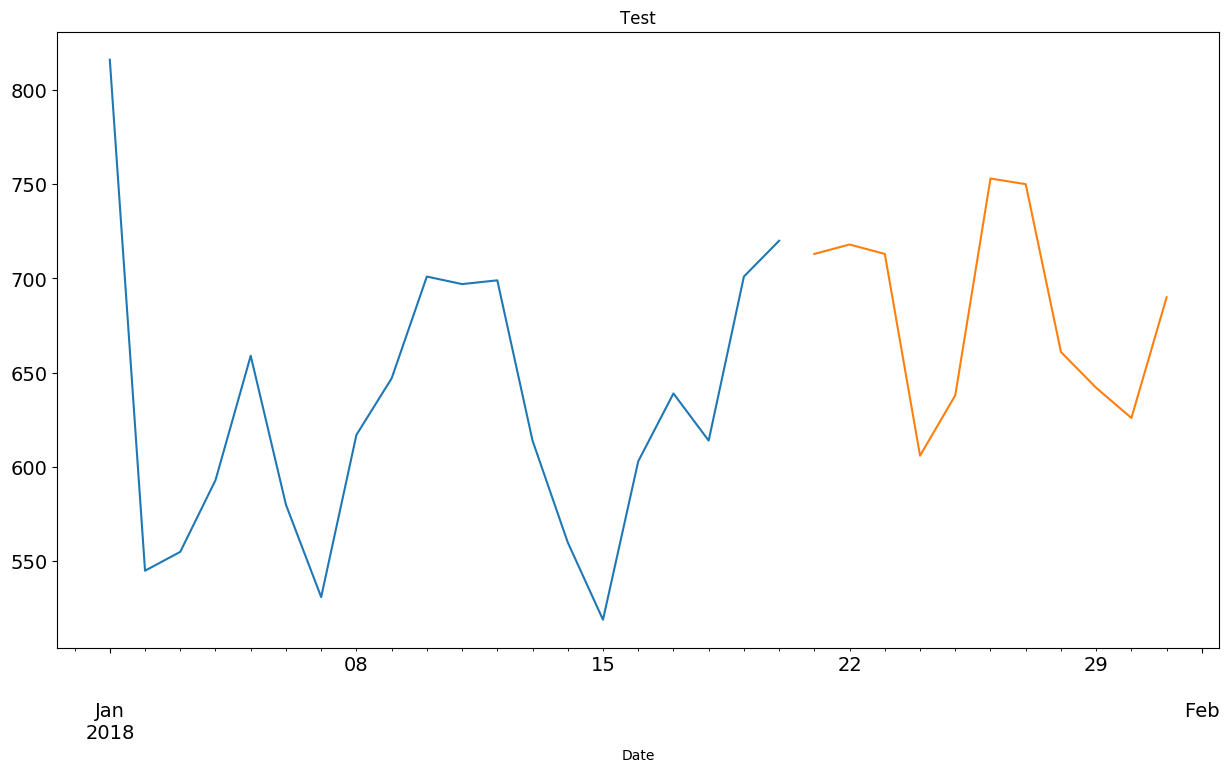

In [59]:
train.Date.plot(figsize=(15, 8), title='Train', fontsize=14)
test.Date.plot(figsize=(15, 8), title='Test', fontsize=14)
plt.show()

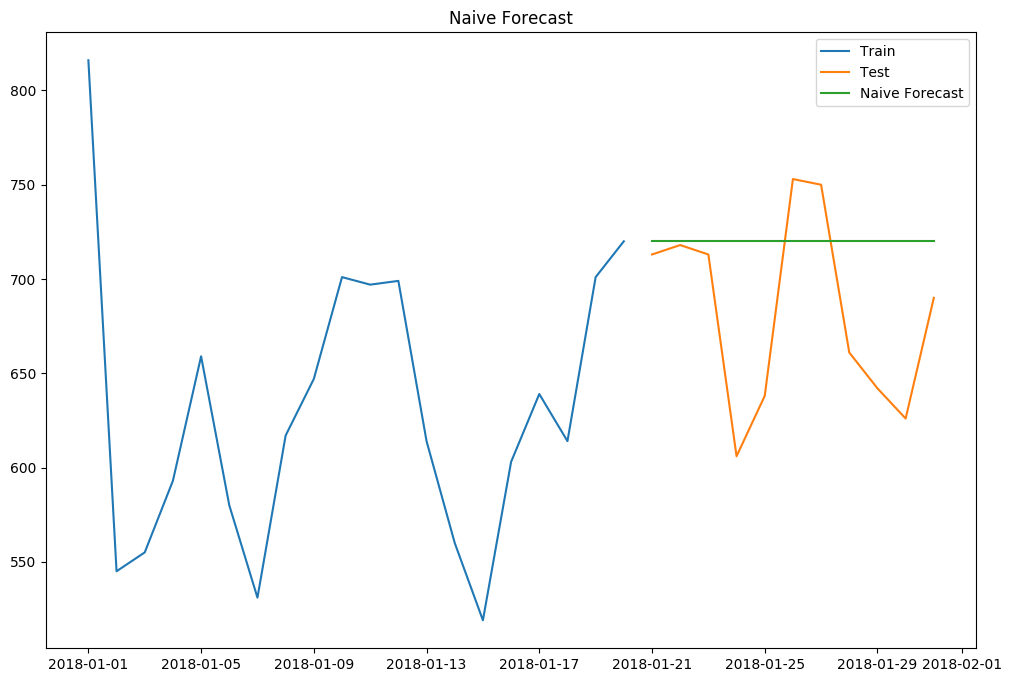

61.13472454713888


In [60]:
# Forecast (Naive)

dd = np.asarray(train.Date)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]

plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Date'], label='Train')
plt.plot(test.index, test['Date'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()
rms_naive = sqrt(mean_squared_error(test.Date, y_hat.naive))
print(rms_naive)

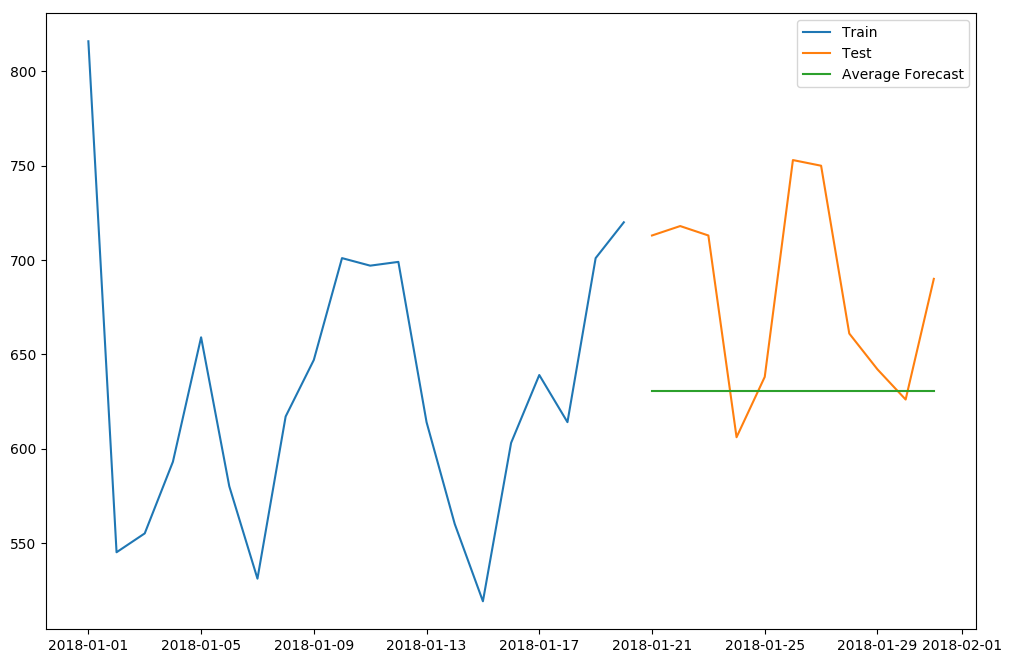

71.2452550254146


In [61]:
# Forecast (Simple Average)

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train.Date.mean()

plt.figure(figsize=(12, 8))
plt.plot(train.Date, label='Train')
plt.plot(test.Date, label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()
rms_simple_average = sqrt(mean_squared_error(test.Date, y_hat_avg.avg_forecast))
print(rms_simple_average)

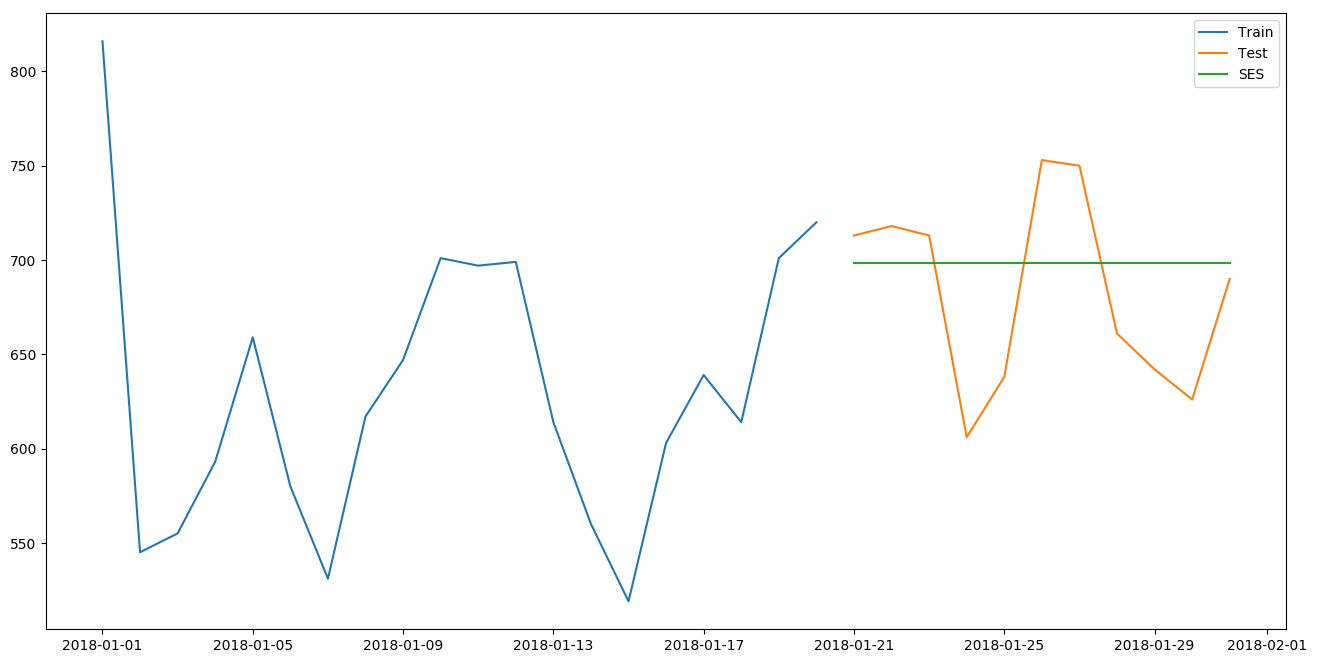

50.99379418825948


In [62]:
# Forecase (Exponential Smoothing)
y_hat_avg_es = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train.Date)).fit(smoothing_level=0.6, optimized=False)
y_hat_avg_es['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16, 8))
plt.plot(train.Date, label='Train')
plt.plot(test.Date, label='Test')
plt.plot(y_hat_avg_es['SES'], label='SES')
plt.legend(loc='best')
plt.show()
rms_es = sqrt(mean_squared_error(test.Date, y_hat_avg_es.SES))
print(rms_es)